## Alucar - Analisando as Vendas

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

%matplotlib inline

In [14]:
ROOT_DIR = os.path.dirname(os.path.abspath( '.' ))
DATA_DIR = os.path.join(ROOT_DIR, 'data')
PROCESSED_DIR = os.path.join(DATA_DIR, 'processed')

In [15]:
alucar = pd.read_csv(os.path.join(PROCESSED_DIR, 'alucar.csv'))

In [16]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [17]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [18]:
print('Quantidade de Dados Nulos:', alucar.isnull().sum().sum())

Quantidade de Dados Nulos: 0


In [19]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [20]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [34]:
print(sns.__version__)

0.9.0


### Gráficos

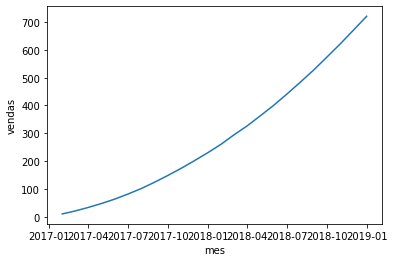

In [36]:
sns.lineplot(x='mes', y='vendas', data=alucar);


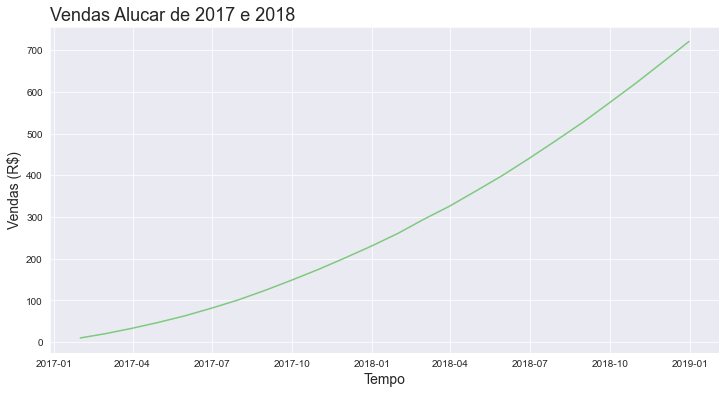

In [45]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14);

In [2]:
alucar.head()

NameError: name 'alucar' is not defined